In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from glob import glob
import random

import matplotlib.pyplot as plt

In [ ]:

ds_train =tf.keras.preprocessing.image_dataset_from_directory(
    "/content/drive/MyDrive/data/traindata")
ds_test =tf.keras.preprocessing.image_dataset_from_directory(
    "/content/drive/MyDrive/dataset/traindata")

Found 2249 files belonging to 8 classes.
Found 2249 files belonging to 8 classes.
Found 591 files belonging to 8 classes.


In [ ]:
IMAGE_SIZE=[224,224]

train_path="/content/drive/MyDrive/data/traindata"
valid_path="/content/drive/MyDrive/dataset"

In [ ]:
inception = InceptionV3(input_shape=IMAGE_SIZE + [3],weights = 'imagenet', include_top=False)

87910968/87910968 [==============================] - 0s 0us/step


In [ ]:
for layer in inception.layers:
  layer.trainable = False

In [ ]:
folders = glob("/content/drive/MyDrive/data/traindata/*")

In [ ]:
x = Flatten()(inception.output)

prediction = Dense(len(folders),activation= 'softmax')(x)

model = Model(inputs=inception.input,outputs=prediction)

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 111, 111, 32)         864       ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 111, 111, 32)         96        ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 activation (Activation)     (None, 111, 111, 32)         0         ['batch_normalization[0][0

In [ ]:
model.compile(
    loss="categorical_crossentropy",
    optimizer='adam',
    metrics=['accuracy']
)

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1/255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)


In [ ]:
training_set = train_datagen.flow_from_directory("/content/drive/MyDrive/data/traindata",
                                                 target_size = (224,224),
                                                 batch_size = 16,
                                              class_mode = 'categorical')

Found 2249 images belonging to 8 classes.


In [ ]:
test_datagen = ImageDataGenerator(rescale = 1/255)
test_set = test_datagen.flow_from_directory("/content/drive/MyDrive/dataset/traindata",
                                                 target_size = (224,224),
                                                 batch_size = 16,
                                              class_mode = 'categorical')

Found 591 images belonging to 8 classes.


In [ ]:
prediction = Dense(len(folders),activation= 'softmax')

In [ ]:
history=model.fit(training_set,batch_size=16,epochs = 10,validation_data=test_set)

Epoch 1/10
141/141 [==============================] - 1089s 8s/step - loss: 2.8541 - accuracy: 0.7230 - val_loss: 1.7645 - val_accuracy: 0.8680
Epoch 2/10
141/141 [==============================] - 41s 294ms/step - loss: 0.6885 - accuracy: 0.8977 - val_loss: 2.1973 - val_accuracy: 0.8782
Epoch 3/10
141/141 [==============================] - 39s 275ms/step - loss: 0.5291 - accuracy: 0.9284 - val_loss: 1.6236 - val_accuracy: 0.9255
Epoch 4/10
141/141 [==============================] - 39s 275ms/step - loss: 0.2987 - accuracy: 0.9586 - val_loss: 1.7662 - val_accuracy: 0.9459
Epoch 5/10
141/141 [==============================] - 39s 278ms/step - loss: 0.2110 - accuracy: 0.9689 - val_loss: 2.1235 - val_accuracy: 0.9509
Epoch 6/10
141/141 [==============================] - 39s 273ms/step - loss: 0.2582 - accuracy: 0.9627 - val_loss: 1.6906 - val_accuracy: 0.9459
Epoch 7/10
141/141 [==============================] - 40s 281ms/step - loss: 0.3501 - accuracy: 0.9586 - val_loss: 2.6005 - val_acc

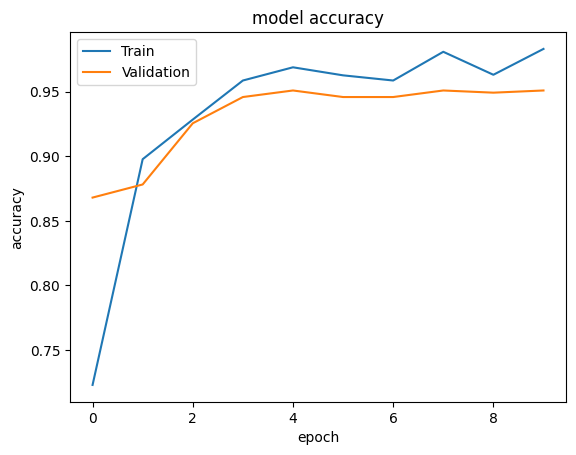

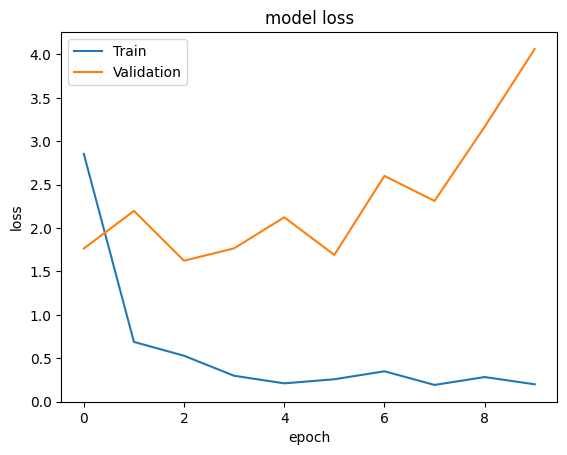

In [ ]:

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


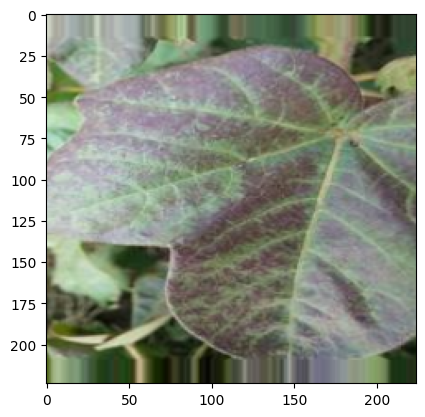

1/1 [==============================] - 0s 29ms/step
predicted class index: phosphorous deficiency


In [ ]:
idx2 = random.randint(0,len(training_set)-1)

image_array,label = training_set[idx2]

plt.imshow(image_array[0])
plt.show()

predictions = model.predict(image_array)

predicted_class_index = np.argmax(predictions[0])

class_name=["copper deficiency","healthy leaf","iron deficiency","magnesium deficiency","molybdenum deficiency","nitrogen deficiency","phosphorous deficiency","pottassium deficiency"]

print("predicted class index:" ,class_name[predicted_class_index])

In [ ]:
tf.keras.models.save_model(model,'inceptionv3.hdf5')

<ipython-input-20-9207c3acb598>:1: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  tf.keras.models.save_model(model,'inceptionv3.hdf5')
